# 0.) Import and Clean data

In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [66]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [67]:
df = pd.read_csv("bank-additional-full (1).csv", sep=';')

In [68]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [69]:
df = df.drop(["default", "pdays",	"previous",	"poutcome",	"emp.var.rate",	"cons.price.idx",	"cons.conf.idx",	"euribor3m",	"nr.employed"], axis = 1)
df = pd.get_dummies(df, columns = ["loan", "job","marital","housing","contact","day_of_week", "campaign", "month", "education"],drop_first = True)


In [70]:
df.head()

,age,duration,y,loan_unknown,loan_yes,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,...,month_nov,month_oct,month_sep,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown
0,56,261,no,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1,57,149,no,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
2,37,226,no,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
3,40,151,no,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
4,56,307,no,False,True,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False


In [71]:
y = pd.get_dummies(df["y"], drop_first = True)
X = df.drop(["y"], axis = 1)

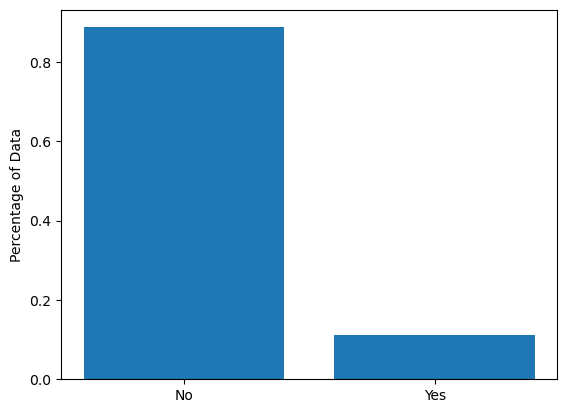

In [72]:
obs = len(y)
plt.bar(["No","Yes"],[len(y[y.yes==0])/obs,len(y[y.yes==1])/obs])
plt.ylabel("Percentage of Data")
plt.show()

In [73]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler().fit(X_train)

X_scaled = scaler.transform(X_train)
X_test = scaler.transform(X_test)


# 1.) Based on the visualization above, use your expert opinion to transform the data based on what we learned this quarter

In [74]:
###############
###TRANSFORM###
###############

from imblearn.over_sampling import SMOTE

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to the training data
X_train_smote, y_train_smote = smote.fit_resample(X_scaled, y_train)

# 2.) Build and visualize a decision tree of Max Depth 3. Show the confusion matrix.

In [75]:
dtree_main = DecisionTreeClassifier(max_depth = 3)
dtree_main.fit(X_scaled, y_train)

DecisionTreeClassifier(max_depth=3)

[Text(0.5, 0.875, 'duration <= 1.025\ngini = 0.2\nsamples = 28831\nvalue = [25580, 3251]\nclass = No'),
 Text(0.25, 0.625, 'duration <= -0.197\ngini = 0.134\nsamples = 25702\nvalue = [23841, 1861]\nclass = No'),
 Text(0.125, 0.375, 'month_mar <= 4.161\ngini = 0.063\nsamples = 16326\nvalue = [15795, 531]\nclass = No'),
 Text(0.0625, 0.125, 'gini = 0.055\nsamples = 16102\nvalue = [15644, 458]\nclass = No'),
 Text(0.1875, 0.125, 'gini = 0.439\nsamples = 224\nvalue = [151, 73]\nclass = No'),
 Text(0.375, 0.375, 'month_oct <= 3.6\ngini = 0.243\nsamples = 9376\nvalue = [8046, 1330]\nclass = No'),
 Text(0.3125, 0.125, 'gini = 0.227\nsamples = 9175\nvalue = [7980, 1195]\nclass = No'),
 Text(0.4375, 0.125, 'gini = 0.441\nsamples = 201\nvalue = [66, 135]\nclass = Yes'),
 Text(0.75, 0.625, 'duration <= 2.22\ngini = 0.494\nsamples = 3129\nvalue = [1739, 1390]\nclass = No'),
 Text(0.625, 0.375, 'contact_telephone <= 0.283\ngini = 0.466\nsamples = 2028\nvalue = [1279, 749]\nclass = No'),
 Text(0.562

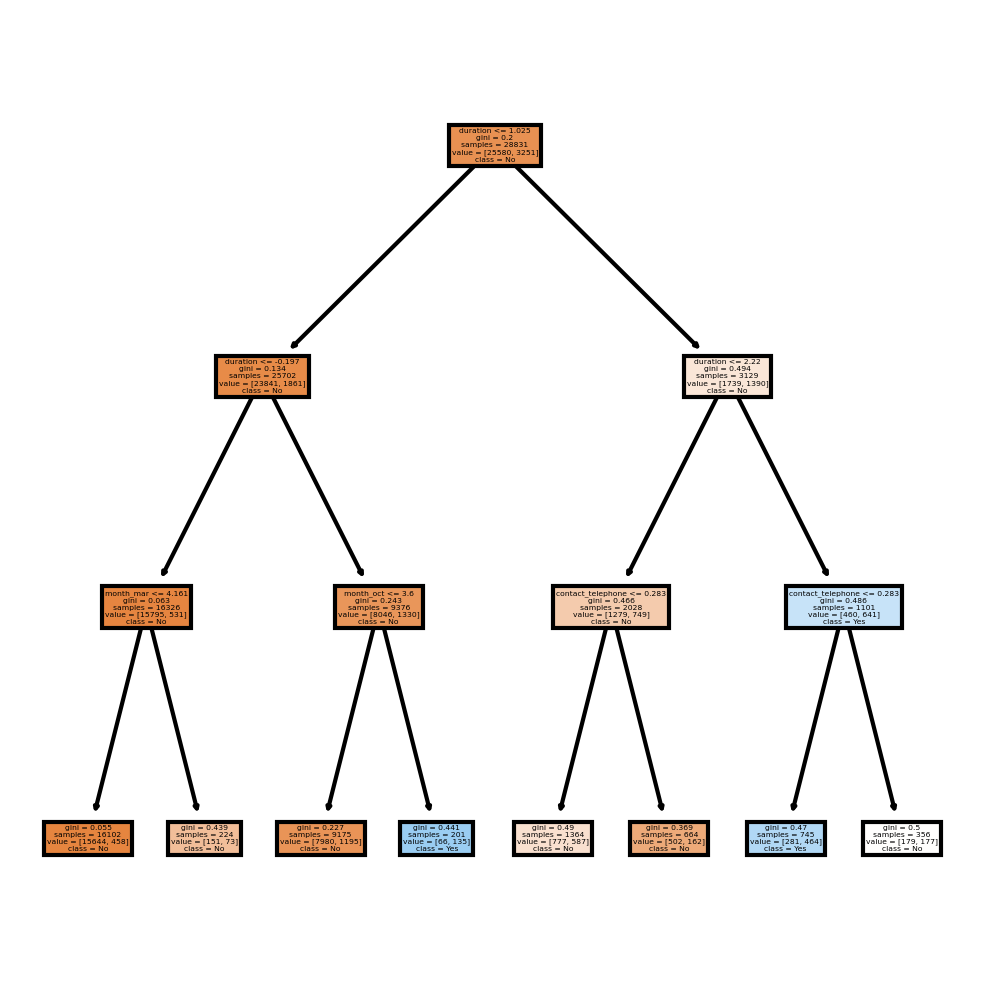

In [76]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
plot_tree(dtree_main, filled = True, feature_names = X.columns, class_names=["No","Yes"])


#fig.savefig('imagename.png')

# 1b.) Confusion matrix on out of sample data. Visualize and store as variable

In [77]:
y_pred = dtree_main.predict(X_test)
y_true = y_test
cm_raw = confusion_matrix(y_true, y_pred)

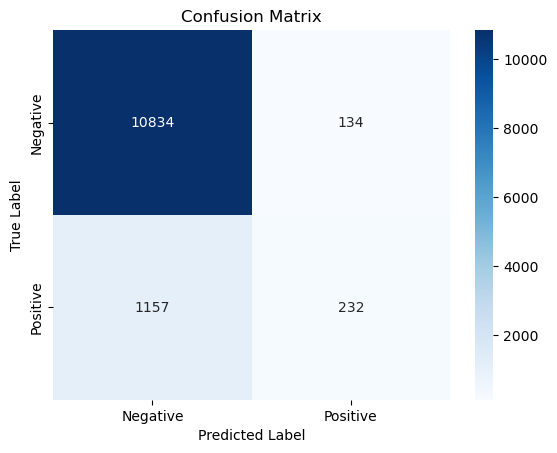

In [78]:
class_labels = ['Negative', 'Positive']

# Plot the confusion matrix as a heatmap
sns.heatmap(cm_raw, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 3.) Use bagging on your descision tree

In [79]:
dtree = DecisionTreeClassifier(max_depth = 3)

In [80]:
bagging = BaggingClassifier(estimator = dtree,
                  n_estimators = 100,
                  max_samples = 0.5,
                  max_features = 1.)

In [81]:
bagging.fit(X_train_smote, y_train_smote)

y_pred = bagging.predict(X_test)

C:\Users\Joshua Suero\AppData\Roaming\Python\Python311\site-packages\sklearn\ensemble\_bagging.py:802: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [82]:
y_true = y_test
cm_raw = confusion_matrix(y_true, y_pred)

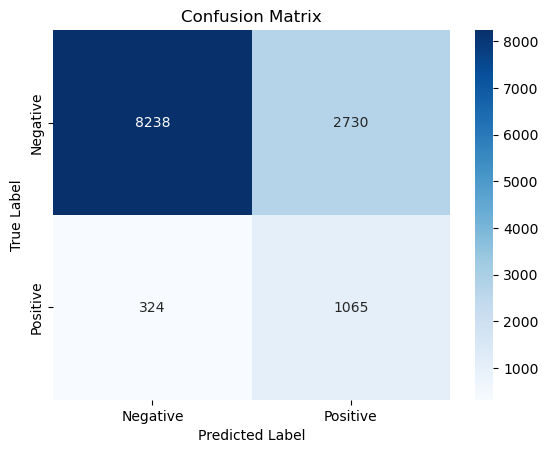

In [83]:
class_labels = ['Negative', 'Positive']

# Plot the confusion matrix as a heatmap
sns.heatmap(cm_raw, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 4.) Boost your tree

In [84]:
from sklearn.ensemble import AdaBoostClassifier

In [85]:
dtree = DecisionTreeClassifier(max_depth = 3)

In [86]:
boost = AdaBoostClassifier(estimator = dtree,
                          n_estimators = 100,
                          learning_rate =.1)

In [87]:
boost.fit(X_train_smote, y_train_smote)

y_pred = boost.predict(X_test)

y_true = y_test
cm_raw = confusion_matrix(y_true, y_pred)

C:\Users\Joshua Suero\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


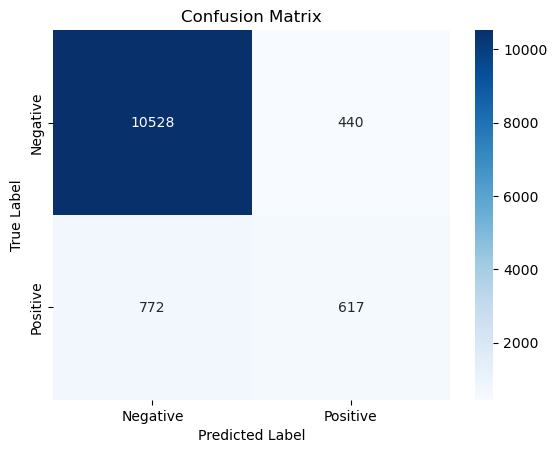

In [88]:
class_labels = ['Negative', 'Positive']

# Plot the confusion matrix as a heatmap
sns.heatmap(cm_raw, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 5.) Create a superlearner with at least 4 base learner models. Use a logistic reg for your metalearner. Interpret your coefficients and save your CM.

In [89]:
pip install mlens

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [90]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [91]:
from sklearn.linear_model import LogisticRegression

In [92]:
base_predictions = [list(dtree_main.predict(X_train_smote)),
                   boost.predict(X_train_smote),
                   bagging.predict(X_train_smote)]

In [93]:
n = len(base_predictions[0])

In [94]:
base_predictions = [np.array(base_predictions)[:,i] for i in range(n)]

In [95]:
super_learner = LogisticRegression()

In [96]:
super_learner.fit(base_predictions, y_train_smote)

C:\Users\Joshua Suero\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [97]:
super_learner.coef_

array([[-0.94807173,  5.27973982,  1.46915579]])

Decision Tree Model Coefficient (-0.94807173):

This coefficient represents the weight assigned to the predictions made by the decision tree model. The negative coefficient indicates that the decision tree model's predictions are negatively contributing to the final prediction made by the super learner.

Gradient Boosting Model Coefficient (5.27973982):

This coefficient represents the weight assigned to the predictions made by the gradient boosting model. The high positive coefficient indicates that the predictions from the gradient boosting model have a strong positive impact on the final prediction made by the super learner. The gradient boosting model seems to be contributing significantly to the final prediction and is likely performing well on the task at hand.

Bagging Model Coefficient (1.46915579):

This coefficient represents the weight assigned to the predictions made by the bagging model. The positive coefficient suggests that the bagging model's predictions are positively contributing to the final prediction made by the super learner. While the coefficient is positive, its magnitude is smaller compared to the coefficient of the gradient boosting model, indicating that the bagging model might be less influential in the final prediction compared to the gradient boosting model.

# 6.)